In [45]:
import numpy as np
import pandas as pd
from pandas_datareader import data as da
import matplotlib as mtplt
import matplotlib.pyplot as plt
from scipy.stats import norm
import yfinance as yf
import datetime


In [40]:
def MC_Simulation(ticker, stock):
    data = pd.DataFrame()
    data[ticker] = da.DataReader(ticker, data_source = 'yahoo' , start='2020-1-1')['Adj Close']
    
    log_returns = np.log(1 + data.pct_change())
    Avg = log_returns.mean()
    Var = log_returns.var()
    drift = Avg - 0.5*Var
    SD = log_returns.std()
    
    time_intervals = 250
    iterations = 100
    
    daily_returns = np.exp( drift.values + SD.values * norm.ppf(np.random.rand(time_intervals , iterations)))
    S0 = data.iloc[-1]
    
    price_list = np.zeros_like(daily_returns)
    price_list[0] = S0
    for n in range(1, time_intervals):
        price_list[n] = price_list[n - 1] * daily_returns[n]
        
    plt.figure(figsize=(10,6))
    plt.title("Monte Carlo Simulation for " + stock)
    plt.ylabel("price")
    plt.xlabel("time(days)")
    plt.plot(price_list)
    plt.show()
    simulation_data=pd.DataFrame(price_list)
    simulation_data['mean']=simulation_data.mean(axis=1)
    
    # taking average of all simulations(plot which will have highest prbability)
    plt.figure(figsize=(10,6))
    plt.plot(simulation_data['mean'])
    plt.show()
    
    

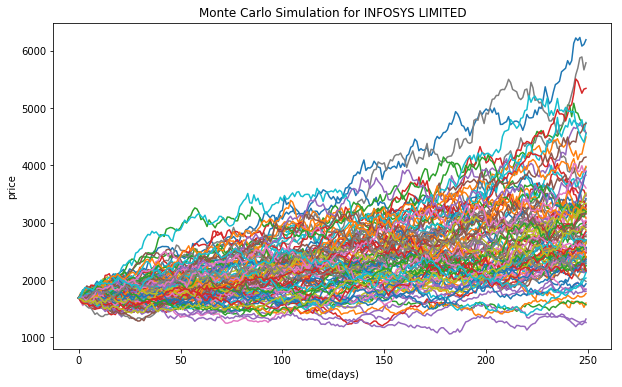

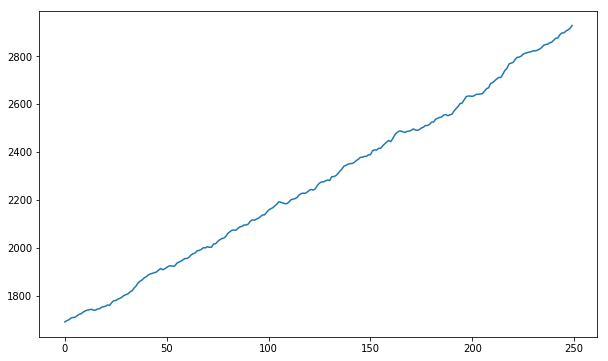

In [47]:
MC_Simulation('INFY.NS', "INFOSYS LIMITED")

In [49]:
# BSM
class Option_pricing:
    def __init__(self,S0,E,T,rf,SD,iterations):
        self.S0=S0
        self.E=E
        self.T=T
        self.rf=rf
        self.SD=SD
        self.iterations=iterations
    
    def Call_option(self):
        # payoff=max(0,(stock_price-Strike_price))
        option_data=np.zeros([self.iterations,2])
        rand=np.random.normal(0,1,[1,self.iterations])
        
        stock_price = self.S0*np.exp(self.T*(self.rf-0.5*self.SD**2)+self.SD*np.sqrt(self.T)*rand)        
        option_data[:,1]=stock_price- self.E
        average=np.sum(np.amax(option_data,axis=1))/float(self.iterations)
        return np.exp(-1.0*self.rf*self.T)*average
    
    def Put_option(self):
        # payoff=max(0,(Strike_price-Stock_price))
        option_data=np.zeros([self.iterations,2])
        rand=np.random.normal(0,1,[1,self.iterations])
        
        stock_price = self.S0*np.exp(self.T*(self.rf-0.5*self.SD**2)+self.SD*np.sqrt(self.T)*rand)        
        option_data[:,1]=self.E-stock_price
        average=np.sum(np.amax(option_data,axis=1))/float(self.iterations)
        return np.exp(-1.0*self.rf*self.T)*average
        
if __name__=='__main__':
    model=Option_pricing(1500,1500,1,0.06,0.2,100)
    #we can also use data we got monte carlo simulation
    print(model.Call_option())
    print(model.Put_option())

184.40173127415875
79.94425219976479
